## Google Data Analyst Capstone Project
 ##### I will be using  bike trip historical datasets  which is provided under the license of <a href="https://ride.divvybikes.com/data-license-agreement">divvy bike trip dataset </a>
 ##### Also I will be using datasets from 2020-04 to 2021-03 which can be found here <a href="https://divvy-tripdata.s3.amazonaws.com/index.html"> link to original dataset </a>
 
### SCENARIO
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that
are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes,
and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members.

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the
pricing flexibility helps Cyclistic attract more customers, Moreno(Marketing Director) believes that maximizing the number of annual members will
be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a
very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic
program and have chosen Cyclistic for their mobility needs.


### BUSINESS TASKS
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from scipy.stats import mstats
from geopy.distance import geodesic 

### ** Importing data **

In [2]:
path = 'C:\\Users\\USER\\biketrip'
all_files = glob.glob(path+ "/*.csv")

#### I have loaded all the datasets and stored them in a list as our data were in monthly format

In [3]:
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
        

#### We can observer that there are 13 different columns in the data sets and "ride_id" is a unique key (primary key) for each ride trip and also "member_casual" column contains only two types of membership i.e either member or casual

In [4]:
li[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84725 entries, 0 to 84724
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             84725 non-null  object 
 1   rideable_type       84725 non-null  object 
 2   started_at          84725 non-null  object 
 3   ended_at            84725 non-null  object 
 4   start_station_name  84725 non-null  object 
 5   start_station_id    84725 non-null  int64  
 6   end_station_name    84626 non-null  object 
 7   end_station_id      84626 non-null  float64
 8   start_lat           84725 non-null  float64
 9   start_lng           84725 non-null  float64
 10  end_lat             84626 non-null  float64
 11  end_lng             84626 non-null  float64
 12  member_casual       84725 non-null  object 
 13  ride_len            84725 non-null  object 
 14  day_of_week         84725 non-null  object 
dtypes: float64(5), int64(1), object(9)
memory usage: 9.7+

In [5]:
li[0].head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_len,day_of_week
0,A847FADBBC638E45,docked_bike,4/26/2020 17:45,4/26/2020 18:12,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,0:26:49,Sun
1,5405B80E996FF60D,docked_bike,4/17/2020 17:08,4/17/2020 17:17,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,0:08:09,Fri
2,5DD24A79A4E006F4,docked_bike,4/1/2020 17:54,4/1/2020 18:08,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,0:14:23,Wed
3,2A59BBDF5CDBA725,docked_bike,4/7/2020 12:50,4/7/2020 13:02,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,0:12:12,Tue
4,27AD306C119C6158,docked_bike,4/18/2020 10:22,4/18/2020 11:15,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,0:52:55,Sat


In [6]:
li[10]['rideable_type'].unique()

array(['classic_bike', 'electric_bike', 'docked_bike'], dtype=object)

#### It looks like "rideable_type" column  contains 3 type of bike i.e 'classic_bike', 'electric_bike' and 'docked_bike' and other columns like 
* "started_at" and "ended_at" columns contains date and time the rider started and ended his ride trip respectively
* "start_station_name" and "end_station_name" columns contains name of starting and ending station name
* "start_station_id" and "end_station_id" columns contains name of starting id and ending station id 
* start_lat,start_lng,end_lat and end_lng contains just the latitude and longitude of start and end station

# Data processing
#### First I will perform common data cleaning processes like
* I will combine all the datasets in one and start cleaning process as it would make it more efficient
* I will try to fill the missing values which can be filled and if we can't than I will remove it as our data is big some missing values wont affect our analysis
* I will remove the duplicat values
* I will also change the data types of the columns as per data type contained by them
* I will also remove the outliers

In [7]:
df = pd.concat(li,ignore_index=True,axis=0)

In [8]:
df.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_len,day_of_week
0,A847FADBBC638E45,docked_bike,4/26/2020 17:45,4/26/2020 18:12,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,0:26:49,Sun
1,5405B80E996FF60D,docked_bike,4/17/2020 17:08,4/17/2020 17:17,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,0:08:09,Fri


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480760 entries, 0 to 3480759
Data columns (total 15 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  ride_len            object 
 14  day_of_week         object 
dtypes: float64(4), object(11)
memory usage: 398.3+ MB


#### From above we can observe that our total number of data in combined state is 3,480,760 before cleaning 

In [10]:
df['started_at'] = pd.to_datetime(df['started_at'])

In [11]:
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [12]:
df['ride_len'] = df['ended_at'] - df['started_at']

In [13]:
df['day_of_week'] = df['started_at'].dt.day_name()

In [14]:
cleaned_df = df[df['started_at'] < df['ended_at']]

In [15]:
cleaned_df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    120126
start_station_id      120727
end_station_name      140688
end_station_id        141124
start_lat                  0
start_lng                  0
end_lat                 4649
end_lng                 4649
member_casual              0
ride_len                   0
day_of_week                0
dtype: int64

In [16]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3454168 entries, 0 to 3480759
Data columns (total 15 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       object         
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       object         
 13  ride_len            timedelta64[ns]
 14  day_of_week         object         
dtypes: datetime64[ns](2), float64(4), object(8), timedelta64[ns](1)
memory usage: 421.7+ MB


In [17]:
cleaned_df['ride_id'].nunique()

3453683

##### We can observer that "ride_id" column contains some repeating value which can be due to some error  so I will remove the rows containing repeated value and also I will try to fill NAN (missing) value
* I have added new two columns "ride_len" and "day_of_week"

In [18]:
clean_df = cleaned_df.drop_duplicates(subset=['ride_id'])

#### As our datasets contain more than 3 millions row so we will drop rows with missing values
* Later i might try to fill them by matching lon,lag with stations name and see if it makes any difference but i doubt that as our dataset already have enough data

In [19]:
clean_df.describe()

,start_lat,start_lng,end_lat,end_lng,ride_len
count,3.453683e+06,3.453683e+06,3.449035e+06,3.449035e+06,3453683
mean,4.190419e+01,-8.764489e+01,4.190446e+01,-8.764516e+01,0 days 00:28:09.202647145
std,4.365166e-02,2.565774e-02,4.374419e-02,2.579043e-02,0 days 04:13:46.162676925
min,4.164000e+01,-8.787000e+01,4.154000e+01,-8.807000e+01,0 days 00:00:01
25%,4.188224e+01,-8.765887e+01,4.188266e+01,-8.765916e+01,0 days 00:08:00
50%,4.190022e+01,-8.764170e+01,4.190068e+01,-8.764275e+01,0 days 00:15:00
75%,4.193000e+01,-8.762773e+01,4.193124e+01,-8.762775e+01,0 days 00:27:00
max,4.208000e+01,-8.752000e+01,4.216000e+01,-8.744000e+01,40 days 18:40:00


In [20]:
clean_df = clean_df.dropna()

In [21]:
clean_df.shape

(3261305, 15)

In [22]:
start_lat = clean_df['start_lat']
start_lng = clean_df['start_lng']
end_lat = clean_df['end_lat']
end_lng = clean_df['end_lng']

In [23]:
origin = []
destination = []
distance_km = []

In [24]:
def make_origin_destination(sl,slg,endl,endlg):
    for sl,slg in zip(sl,slg):
        origin.append((sl,slg))
    for i,j in zip(endl,endlg):
        destination.append((i,j))

In [25]:
make_origin_destination(start_lat,start_lng,end_lat,end_lng)

In [26]:
def distance_converter(origin,destination):
    for o,d in zip(origin,destination):
        distance_km.append(geodesic(o,d).km)

In [27]:
distance_converter(origin,destination)

In [28]:
clean_df['distance_km'] = distance_km

In [29]:
clean_df.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
ride_len              0
day_of_week           0
distance_km           0
dtype: int64

In [30]:
clean_df.head(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_len,day_of_week,distance_km
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:00,2020-04-26 18:12:00,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,0 days 00:27:00,Sunday,3.981346
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:00,2020-04-17 17:17:00,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,0 days 00:09:00,Friday,0.979629
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:00,2020-04-01 18:08:00,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,0 days 00:14:00,Wednesday,2.984661


In [31]:
clean_df.shape

(3261305, 16)

##### I have dropped the missing value rows and also added new column called "distance_km" by computing values of latitude and longitude columns 

# DATA ANALYSIS

In [32]:
new_df = clean_df.groupby(['day_of_week','member_casual'],as_index=False)['ride_len'].agg(['mean','max','min'])

In [33]:
new_df.reset_index(inplace=True)
new_df

,day_of_week,member_casual,mean,max,min
0,Friday,casual,0 days 00:43:32.856800196,38 days 16:04:00,0 days 00:00:01
1,Friday,member,0 days 00:15:41.036965340,8 days 06:17:00,0 days 00:00:01
2,Monday,casual,0 days 00:45:48.410395154,32 days 01:25:00,0 days 00:00:01
3,Monday,member,0 days 00:15:11.934601298,23 days 05:01:00,0 days 00:00:01
4,Saturday,casual,0 days 00:47:30.367047400,35 days 04:53:00,0 days 00:00:01
5,Saturday,member,0 days 00:17:49.871180369,37 days 14:25:00,0 days 00:00:01
6,Sunday,casual,0 days 00:51:20.730845315,35 days 12:26:00,0 days 00:00:01
7,Sunday,member,0 days 00:18:17.798064765,40 days 18:40:00,0 days 00:00:01
8,Thursday,casual,0 days 00:43:54.265133437,32 days 22:11:00,0 days 00:00:01
9,Thursday,member,0 days 00:15:08.210045224,25 days 02:36:00,0 days 00:00:01


#### We can observer that maximum ride length is over 40 days which can be an error or it can be that some people really rented the bike for over a month.  For exact reason we would need to discuss it with the peoples who collected the data but for now we will analyse the datasets with outliers and without outliers

### With outliers

Text(0.5, 1.0, 'Days vs Average ride in (min) ')

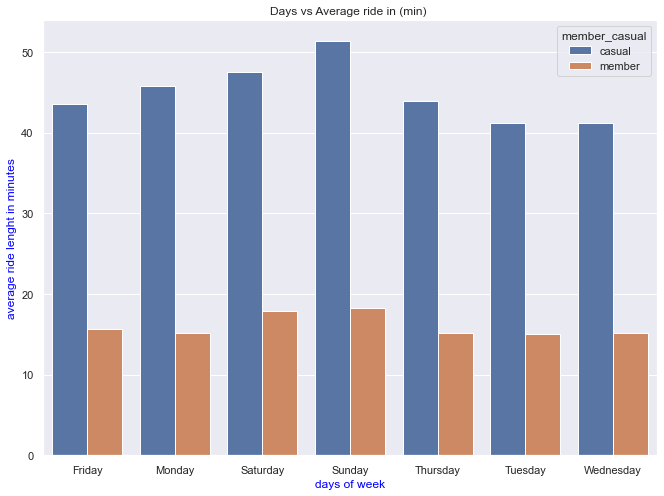

In [34]:
y = new_df['mean'].dt.total_seconds()/60
X = new_df['day_of_week']
plt.figure(figsize=(11,8))
sns.set_theme(style="darkgrid")
sns.barplot(x=X,y=y,data=new_df,hue='member_casual')
plt.xlabel('days of week',size=12,color='blue')
plt.ylabel('average ride lenght in minutes',size=12,color='blue')
plt.title('Days vs Average ride in (min) ')

In [35]:
count_df = clean_df.groupby(['day_of_week','member_casual'],as_index=False)['ride_id'].agg({'total_ride':'count'})
count_df

,day_of_week,member_casual,total_ride
0,Friday,casual,195112
1,Friday,member,286701
2,Monday,casual,141008
3,Monday,member,250112
4,Saturday,casual,317632
5,Saturday,member,302058
6,Sunday,casual,248712
7,Sunday,member,248342
8,Thursday,casual,155054
9,Thursday,member,281706


In [36]:
X = count_df['day_of_week']
y = count_df['total_ride']

Text(0.5, 1.0, 'Days vs Number of total ride ')

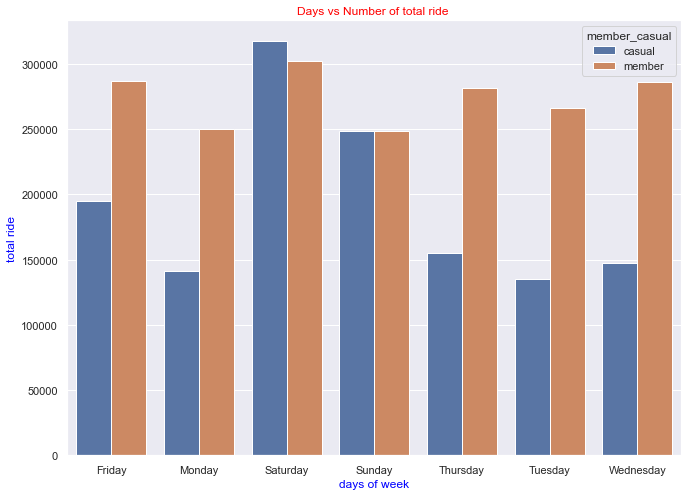

In [37]:
plt.figure(figsize=(11,8))
sns.barplot(x=X,y=y,data=count_df,hue='member_casual')
plt.xlabel('days of week',size=12,color='blue')
plt.ylabel('total ride',size=12,color='blue')
plt.title('Days vs Number of total ride ',color='red')

#### From above charts it 's clear that casual member have preference for weekends but members dont have exact preference 

In [38]:
membership_type = clean_df.loc[:,['ride_len','distance_km','member_casual']]
membership_type['ride_len'] = clean_df['ride_len'].dt.total_seconds()/60
member_x = membership_type.loc[membership_type['member_casual']=='member','ride_len']
member_y = membership_type.loc[membership_type['member_casual']=='member','distance_km']
casual_x = membership_type.loc[membership_type['member_casual']=='casual','ride_len']
casual_y = membership_type.loc[membership_type['member_casual']=='casual','distance_km']

<AxesSubplot:title={'center':'casual'}, xlabel='ride len in minutes', ylabel='distance_km'>

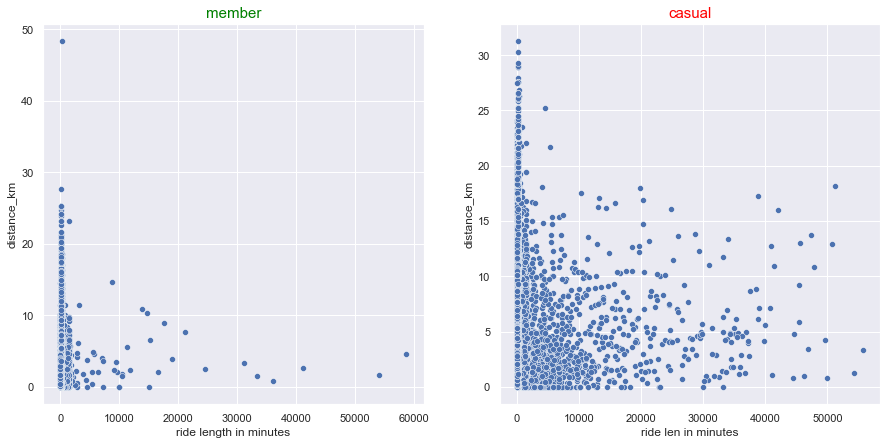

In [39]:
fig,axes = plt.subplots(1,2,figsize=(15,7))
axes[0].set_title('member',color='green',size=15)
axes[0].set_xlabel('ride length in minutes')
sns.scatterplot(x=member_x,y=member_y,ax=axes[0])
axes[1].set_title('casual',color='red',size=15)
axes[1].set_xlabel('ride len in minutes')
sns.scatterplot(x=casual_x,y=casual_y,ax=axes[1])

#### We can can observe that casual riders tends to ride longer in average compared to members

In [41]:
clean_df[clean_df['member_casual']=='casual']['start_station_name'].value_counts().head(15)

Streeter Dr & Grand Ave         25864
Lake Shore Dr & Monroe St       20388
Millennium Park                 19172
Theater on the Lake             14779
Michigan Ave & Oak St           13438
Indiana Ave & Roosevelt Rd      13410
Lake Shore Dr & North Blvd      13136
Clark St & Elm St               11769
Michigan Ave & Lake St          11533
Michigan Ave & Washington St    10527
Clark St & Lincoln Ave          10012
Buckingham Fountain              9928
Wells St & Concord Ln            9851
Clark St & Armitage Ave          9689
Shedd Aquarium                   9665
Name: start_station_name, dtype: int64

In [42]:
clean_df[clean_df['member_casual']=='casual']['end_station_name'].value_counts().head(15)

Streeter Dr & Grand Ave         28207
Millennium Park                 20028
Lake Shore Dr & Monroe St       19942
Theater on the Lake             16648
Lake Shore Dr & North Blvd      14146
Michigan Ave & Oak St           14024
Indiana Ave & Roosevelt Rd      13528
Clark St & Elm St               11210
Michigan Ave & Lake St          11060
Michigan Ave & Washington St    10515
Clark St & Lincoln Ave          10227
Wabash Ave & Grand Ave          10032
Wells St & Concord Ln           10007
Fairbanks Ct & Grand Ave         9513
Clark St & Armitage Ave          9421
Name: end_station_name, dtype: int64

#### Above we can observe the stations at which highest number of casual member are starting and ending their ride. We might want to pay more attention to those staions

In [43]:
clean_df[clean_df['start_station_name'] ==clean_df['end_station_name']]['start_station_name'].value_counts().head(15)


Streeter Dr & Grand Ave            6739
Lake Shore Dr & Monroe St          6488
Millennium Park                    5094
Buckingham Fountain                5088
Indiana Ave & Roosevelt Rd         4658
Michigan Ave & Oak St              3981
Theater on the Lake                3647
Shore Dr & 55th St                 3593
Fort Dearborn Dr & 31st St         3584
Michigan Ave & 8th St              3377
Lake Shore Dr & North Blvd         3376
Lakefront Trail & Bryn Mawr Ave    3014
Wabash Ave & 9th St                2852
Michigan Ave & Lake St             2841
Lake Shore Dr & Belmont Ave        2706
Name: start_station_name, dtype: int64

##### Top 15 stations where people started and ended their ride at the same stations

### Without outliers

In [104]:
per_list = [0.001, 0.01, 0.011,0.012, 0.013,0.014,0.015,0.025, 0.25, 0.5, 0.75, 0.99, 0.997, 0.998, 0.999, 1.0]
without_outliers = membership_type.clip(lower=membership_type.quantile(0.01),upper=membership_type.quantile(1.0),axis=1)
quantile = without_outliers.quantile(per_list)

In [105]:
quantile['count'] = per_list

In [106]:
quantile['count'] = np.floor(quantile['count']*len(membership_type))

In [107]:
quantile

,ride_len,distance_km,count
0.001,1.533333,0.000000,3261.0
0.010,1.533333,0.000000,32613.0
0.011,1.866667,0.000000,35874.0
0.012,2.000000,0.000000,39135.0
0.013,2.000000,0.000000,42396.0
0.014,2.000000,0.000000,45658.0
0.015,2.000000,0.000000,48919.0
0.025,2.683333,0.000000,81532.0
0.250,8.000000,0.870737,815326.0
0.500,15.000000,1.705532,1630652.0


In [112]:
lower_limit = membership_type['ride_len'].quantile(0.015)

In [113]:
upper_limit = membership_type['ride_len'].quantile(0.999)

In [115]:
df1 = membership_type[(membership_type['ride_len']>lower_limit) & (membership_type['ride_len']<upper_limit)]

In [122]:
member_x = df1.loc[df1['member_casual']=='member','ride_len']
member_y = df1.loc[df1['member_casual']=='member','distance_km']
casual_x = df1.loc[df1['member_casual']=='casual','ride_len']
casual_y = df1.loc[df1['member_casual']=='casual','distance_km']

<AxesSubplot:title={'center':'casual'}, xlabel='ride len in minutes', ylabel='distance_km'>

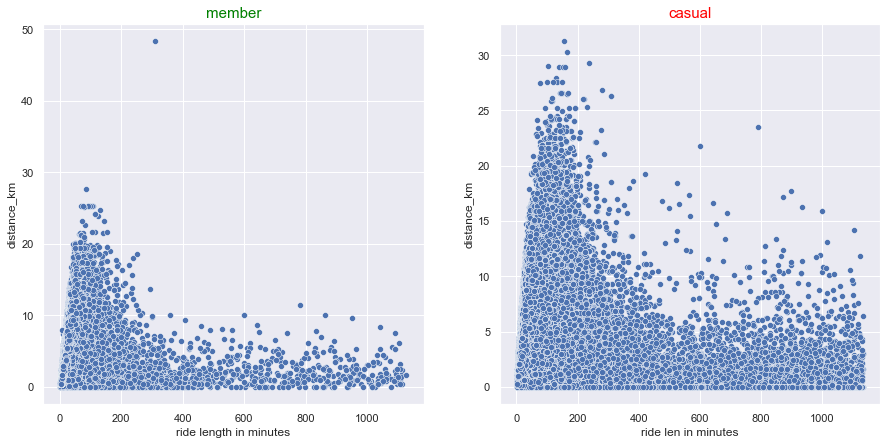

In [123]:
fig,axes = plt.subplots(1,2,figsize=(15,7))
axes[0].set_title('member',color='green',size=15)
axes[0].set_xlabel('ride length in minutes')
sns.scatterplot(x=member_x,y=member_y,ax=axes[0])
axes[1].set_title('casual',color='red',size=15)
axes[1].set_xlabel('ride len in minutes')
sns.scatterplot(x=casual_x,y=casual_y,ax=axes[1])

#### we can say that majority member ride for less than 400 min which is around 16 hour 40 minute and in case of casual member  that they ride less than around 500-600 min which is approximately 20 hour 50 min and 25 hour respectively. There are also high number of riders who started  and ended at same station hence 0 distance covered (to be exact its 340360 )

### ** Genreally accepted Seasons cycle in USA **

* Winter – December, January and February.
* Spring – March,  April and May.
* Summer – June, July and August.
* Autumn – September, October and November.

In [165]:
clean_df.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_len,day_of_week,distance_km,months
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:00,2020-04-26 18:12:00,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,0 days 00:27:00,Sunday,3.981346,April
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:00,2020-04-17 17:17:00,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,0 days 00:09:00,Friday,0.979629,April


In [164]:
clean_df['months'] = clean_df['started_at'].dt.month_name()

In [170]:
grouped_df = clean_df.groupby(['months','member_casual'],as_index=False)['ride_id'].agg({'total':'count'})
grouped_df

,months,member_casual,total
0,April,casual,23496
1,April,member,60539
2,August,casual,279221
3,August,member,320225
4,December,casual,24492
5,December,member,89047
6,February,casual,8613
7,February,member,34381
8,January,casual,14690
9,January,member,68818


In [181]:
X = grouped_df['months']
y = grouped_df['total']

<AxesSubplot:xlabel='months', ylabel='total'>

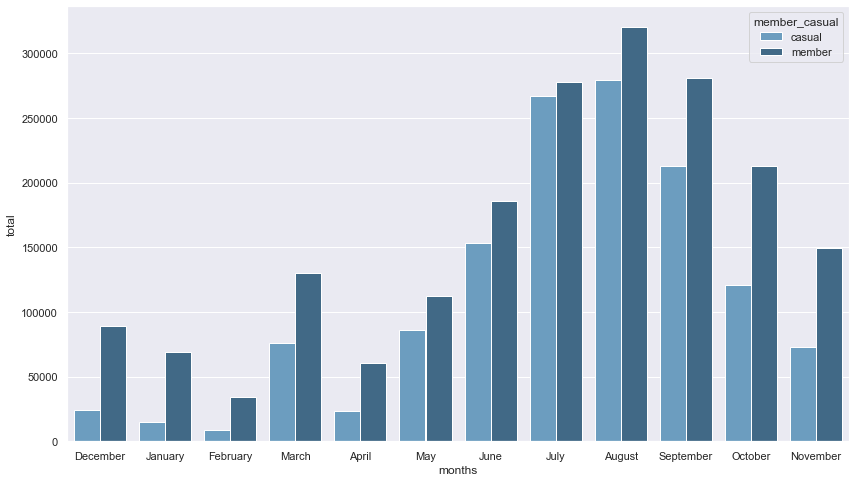

In [210]:
order = ['December', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
plt.figure(figsize=(14,8))
sns.barplot(x=X,y=y,hue='member_casual',data =grouped_df,order=order,palette='Blues_d')

### From above we can conclude that in
 * Winter – December, January and February.      (lowest number of riders) 
 * Spring – March, April and May.      (low number of riders
 * Summer – June, July and August.       (higest number of riders)
 * Autumn – September, October and November.    (high number of riders)
 
 ##### As season starts to approach summer, number of riders start increasing reaching peak in August and september and it gradually start to decrease as season again start  approching winter

# CONCLUSION 

From above analysis we cant exactly conclude how members use bicycle different than casual riders. But it look like casual riders tends to ride bicycle more during weekends as footfall of casual riders is more during weekends. Also it looks casual riders ride bike for longer duration compared to members.

We can't exactly conclude why would casual rider would buy membership as data provided to us is limited. For example our data doesnt contain the feedback of members like why they changed from casual to member or what's the thought of casual rider on membership.

Also there is no clear indication of how cyclist can influe casual riders to buy membership due to limitation of our data.
To overcome this problem maybe questionner/data collector can ask some open-end questions, discriptive questions or maybe leading questions with why attached to it.

Although data is limited which resulted in limitiation in our analysis. However avertising departments can advertise about membership in top 10 to 15 bike stations where footfall of casual rider is maximum. For best response they should advertise it during the end of spring season. Also as we can observe that footfall of casual riders in maximum during weekends so maybe company can charge fare more during the weekends for casual riders which may motivate them to take membership.




# NEXT STEPS
* Advertising departments should advertise about membership in top 10-15 stations where footfall of casual riders is maximum to reach out to maximum number of casual riders
* For high response they should advertise it during the end of spring season
* Maybe company can provide some incentives like offers and discounts in membership 
* Company also can offers discounts or free membership for months based on number of referrals 
* Company should charge higher during the weekends as casual riders prefers to ride more during friday and weekends 
* Data collector/questionners should include or collect survey/opinion/thoughts of both casual and member riders for more deep analysis
